testing the Pysme package https://pysme-astro.readthedocs.io/en/latest/index.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
import scipy.interpolate as interpolate 
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
from scipy.optimize import leastsq
import astropy.constants as const

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
#from pysme.gui import plot_plotly
from pysme import sme as SME
from pysme import util
from pysme.solve import solve
from pysme.synthesize import synthesize_spectrum

from pysme.abund import Abund
from pysme.linelist.vald import ValdFile
# from pysme.persistence import save_as_idl

In [4]:
datah = Table.read('spectra/eg_uma_H_20190319_smoothed.ecsv')
datak = Table.read('spectra/eg_uma_K_20190319_smoothed.ecsv')

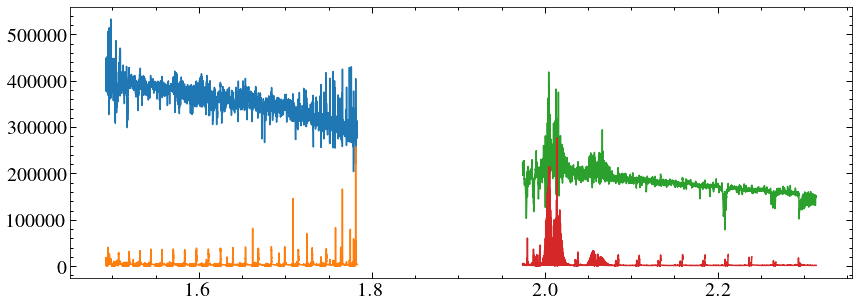

In [5]:
hcut = [6000, 31000]
kcut = [8000, 31000]

waves = []
fluxes = []
errors = []
for data, cut in zip([datah,datak], [hcut, kcut]):
    w, f, e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
    w, f, e = w[cut[0]:cut[1]], f[cut[0]:cut[1]], e[cut[0]:cut[1]]
    waves.append(w)
    fluxes.append(f)
    errors.append(e)
    plt.plot(w,f)
    plt.plot(w,e)


In [6]:
sme = SME.SME_Structure()
# sme.abund = Abund(0, "asplund2009")

In [7]:
sme.teff, sme.logg, sme.monh = 3500, 5.0, -0.1
sme.abund = Abund.solar()

In [8]:
vald = ValdFile("linelist.lin")
sme.linelist = vald

INFO - Loading VALD file linelist.lin


FileNotFoundError: [Errno 2] No such file or directory: 'linelist.lin'

Need a linelist, have send request to VALD.

In [11]:
w[-1]

2.3139168927157296